# Amsterdam House Price Prediction

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, learning_curve, cross_val_score

warnings.simplefilter('ignore')

In [71]:
house_data = pd.read_csv(r'C:\Users\IDEAPAD\Desktop\GOMYCODE\DataSet\HousingPrices-Amsterdam-August-2021.csv')
house_data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [72]:
house_data.shape

(924, 8)

In [73]:
house_data = house_data.drop(['Unnamed: 0', 'Address', 'Zip'], axis = 1)
house_data.head(2)

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586


In [74]:
house_data.isnull().sum()

Price    4
Area     0
Room     0
Lon      0
Lat      0
dtype: int64

In [75]:
house_data = house_data.dropna(axis = 0)
house_data.shape

(920, 5)

In [76]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    920 non-null    int64  
 2   Room    920 non-null    int64  
 3   Lon     920 non-null    float64
 4   Lat     920 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 43.1 KB


In [77]:
house_data.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805


<AxesSubplot:xlabel='Room', ylabel='Price'>

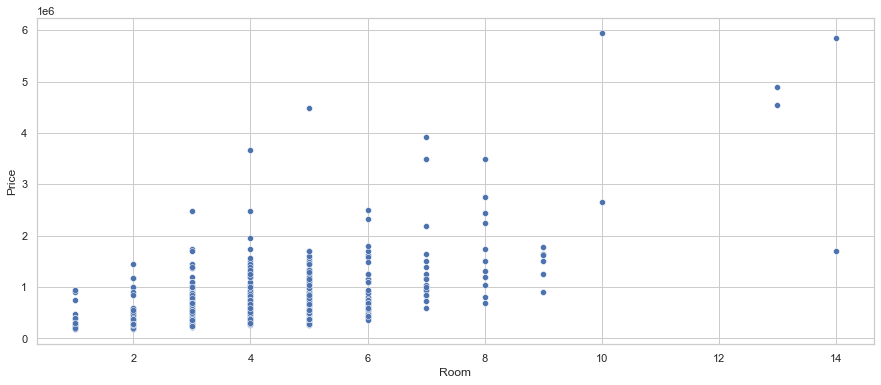

In [78]:
# Visualisation
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(data=house_data, x="Room", y="Price")

<AxesSubplot:xlabel='Area', ylabel='Price'>

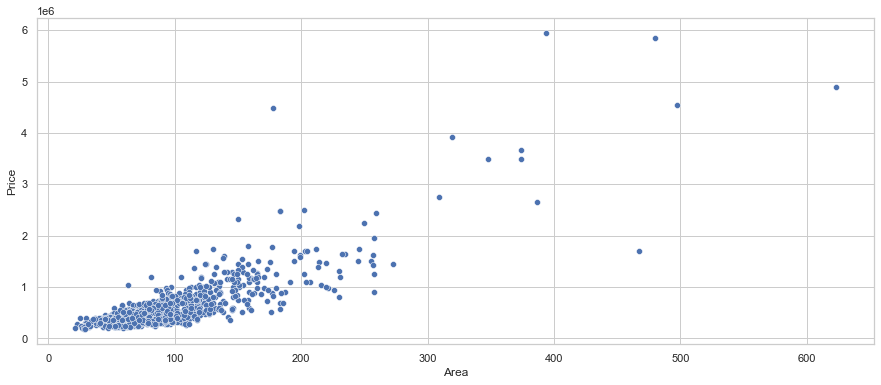

In [79]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=house_data, x="Area", y="Price")

<AxesSubplot:xlabel='Lon', ylabel='Price'>

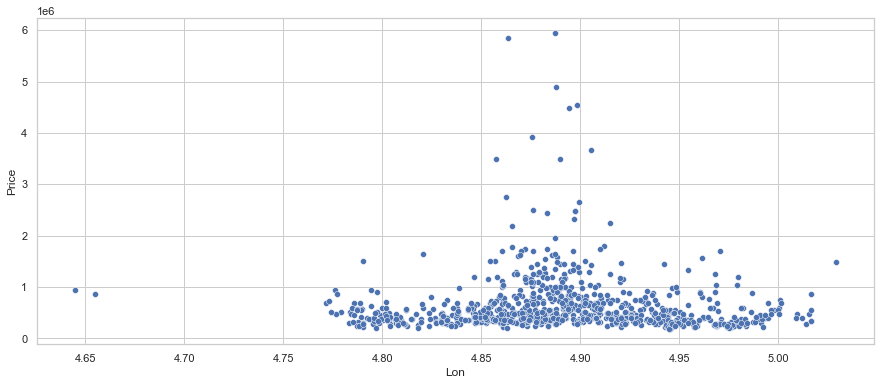

In [80]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=house_data, x="Lon", y="Price")

<AxesSubplot:xlabel='Lat', ylabel='Price'>

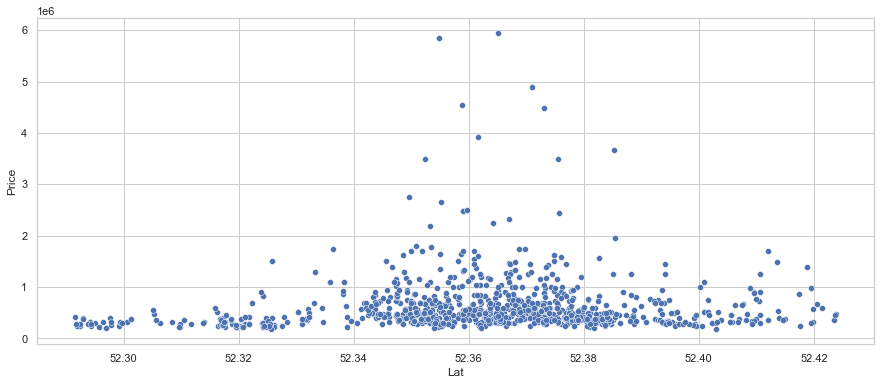

In [81]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=house_data, x="Lat", y="Price")

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

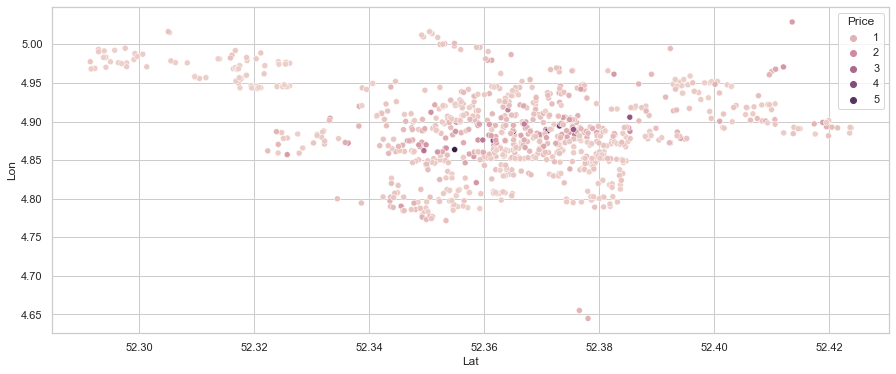

In [82]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=house_data, x="Lat", y="Lon", hue="Price")

<AxesSubplot:>

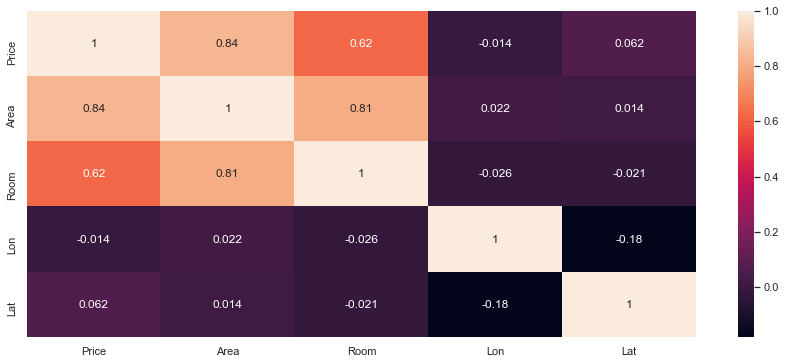

In [83]:
# Matrice de Corrélation
corr = house_data.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True)

Création du modèle de Régression Linéaire

In [84]:
# Cross Validation
X = house_data.drop('Price', axis = 1)
y = house_data['Price']
model = LinearRegression()
cv3 = StratifiedKFold(4)
tab = cross_val_score(model, X, y, cv = cv3)
print(("Score : {}%").format(round(np.mean(tab) * 100 , 2)))

Score : 70.77%


In [85]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
rl_model = LinearRegression()
rl_model.fit(X_train, y_train)
y_pred = rl_model.predict(X_test)
print(("Train Score : {}%").format(round(rl_model.score(X_train, y_train) * 100, 2)))
print(("Test Score : {}%").format(round(rl_model.score(X_test, y_test) * 100, 2)))

Train Score : 73.21%
Test Score : 59.72%


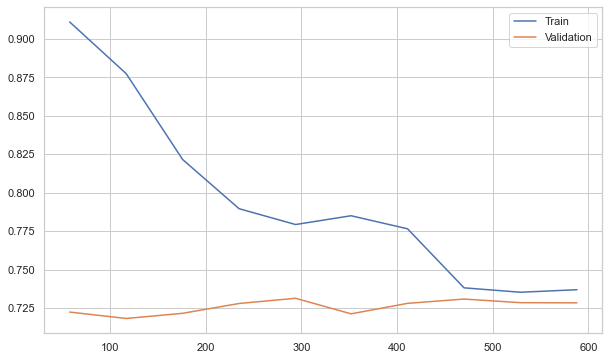

In [52]:
# Voir si Notre modèle peu encore évolué => Learning_curve
N, train_score, val_score = learning_curve(rl_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis = 1), label = "Train")
plt.plot(N, val_score.mean(axis = 1), label = "Validation")
plt.xlabel = "Train Size"
plt.legend()